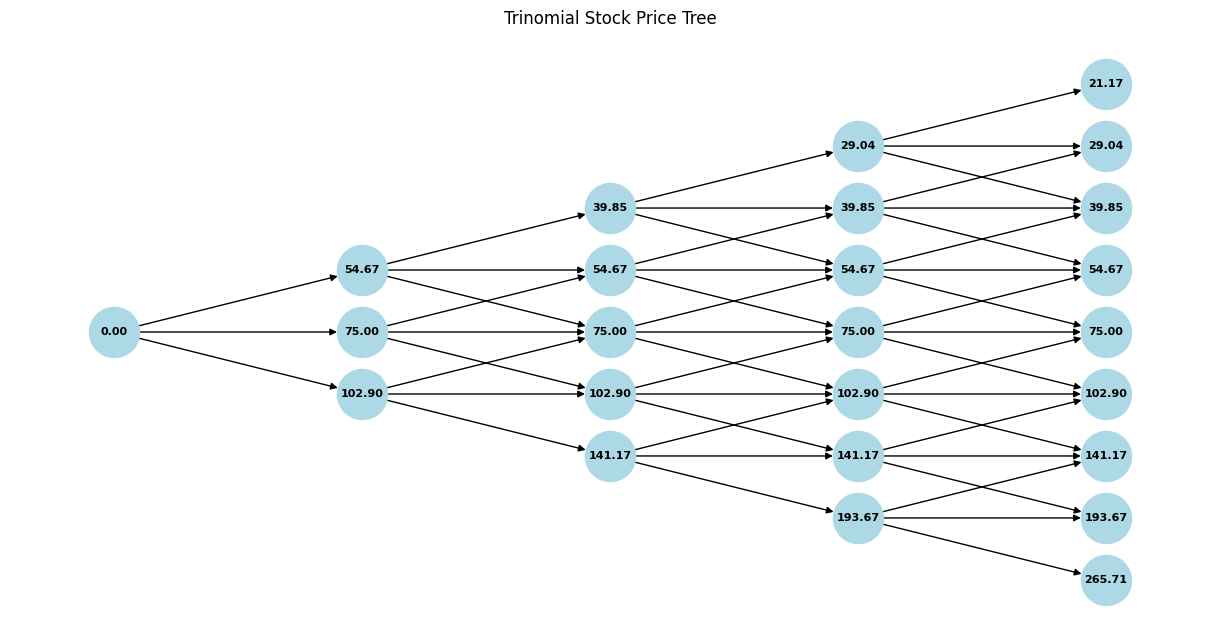

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Function to calculate and plot the trinomial stock price tree
def plot_trinomial_tree(S0, F, T, r, k, coupon, conversion_ratio, N, sigma,):
    dt = T / N  # Time step
    nu = r - q - 0.5 * sigma ** 2  # Drift term

    # Trinomial tree parameters
    u = np.exp(sigma * np.sqrt(2 * dt))  # Up movement
    d = 1 / u  # Down movement
    m = 1  # Middle movement (no movement)

    # Risk-neutral probabilities (not needed for the plot, but calculated for completeness)
    pu = ((np.exp(nu * dt / 2) - d) / (u - d)) ** 2  # Probability of up
    pd = ((u - np.exp(nu * dt / 2)) / (u - d)) ** 2  # Probability of down
    pm = 1 - pu - pd  # Probability of middle (no movement)

    # Create the trinomial stock price tree
    StockPrice = np.zeros((2 * N + 1, N + 1))  # Trinomial tree requires 2N+1 nodes at maturity

    # Set the stock prices at the root (initial stock price)
    StockPrice[N, 0] = S0  # Root of the tree

    # Fill the tree with stock prices
    for j in range(1, N + 1):
        for i in range(2 * j + 1):  # Number of nodes at each step
            StockPrice[i, j] = S0 * (u ** (j - i))  # Fill the tree based on up/middle/down movements

    # Plot the tree using networkx
    G = nx.DiGraph()  # Directed graph for the tree structure
    pos = {}  # Dictionary to hold positions of nodes
    labels = {}  # Dictionary to hold labels (stock prices) for nodes

    # Add nodes and edges to the graph
    for j in range(N + 1):
        for i in range(2 * j + 1):
            node = f"{j},{i}"  # Unique identifier for each node
            G.add_node(node)
            pos[node] = (j, i - j)  # Position for plotting (x, y)
            labels[node] = f"{StockPrice[i, j]:.2f}"  # Label with stock price

            # Add edges between nodes for the trinomial structure
            if j < N:
                G.add_edge(node, f"{j + 1},{i}")  # Down movement
                G.add_edge(node, f"{j + 1},{i + 1}")  # Middle movement
                G.add_edge(node, f"{j + 1},{i + 2}")  # Up movement

    # Plot the tree using networkx
    plt.figure(figsize=(12, 6))
    nx.draw(G, pos, labels=labels, with_labels=True, node_size=1300, node_color="lightblue", font_size=8, font_weight="bold", edge_color="black")
    plt.title("Trinomial Stock Price Tree")
    plt.show()

# Parameters
S0 = 75                             # Initial stock price
F = 100                             # Face value of the bond
X = 100                             # Strike price for conversion
T = 5                               # Time to maturity (in years)
r = 0.07                            # Risk-free rate
q = 0
b = r - q
k = 0.03                            # Credit spread
sigma = 0.2                         # Volatility
dt = 1
coupon = 6                          # Coupon payment per year
m = 1                               # Conversion ratio (1 bond = 1 stock)
N = 4                               # Number of time steps
conversion_ratio = F / X            # Conversion ratio

# Plot the trinomial tree for the stock prices
plot_trinomial_tree(S0, F, T, r, k, coupon, conversion_ratio, N, sigma)


In [1]:
import numpy as np

#Test American
AmeEurFlag='a'
CallPutFlag='p'
S=100
X=110
T=0.5
r=0.1
b=0.1
sigma=0.27
N=100

#Test European

# AmeEurFlag='e'
# CallPutFlag='p'
# S=75
# X=70
# T=0.5
# r=0.1
# b=0.05
# sigma=0.35
# N=300

q=b-r
if(CallPutFlag=='c'):
    z=1
elif(CallPutFlag=='p'):
    z=-1

dt=T/N

u=np.exp(sigma*np.sqrt(2*dt))
d=np.exp(-sigma*np.sqrt(2*dt))
pu=((np.exp(b*dt/2)-np.exp(-sigma*np.sqrt(dt/2)))/(np.exp(sigma*np.sqrt(dt/2))-np.exp(-sigma*np.sqrt(dt/2))))**2
pd=((np.exp(sigma*np.sqrt(dt/2))-np.exp(b*(dt/2)))/(np.exp(sigma*np.sqrt(dt/2))-np.exp(-sigma*np.sqrt(dt/2))))**2
pm=1-pu-pd
Df=np.exp(-r*dt)

OptionValue=np.zeros(2*N+1)

for i in range(0, 2*N+1):
    ST=S*u**np.max([i-N,0])*d**np.max([N-i,0])
    OptionValue[i]=np.max([0,z*(ST-X)])
    
for j in range(N-1, -1, -1):
    for i in range(2*j+1):
        OptionValue[i]=(pu*OptionValue[i+2]+pm*OptionValue[i+1]+pd*OptionValue[i])*Df
        if AmeEurFlag=='a':
            StockPrice=S*u**np.max([i-j,0])*d**np.max([j-i,0])
            OptionValue[i]=np.max([z*(StockPrice-X),OptionValue[i]])
print(OptionValue[0])
            


11.66850481852201


In [13]:
import numpy as np
import matplotlib.pyplot as plt

def compute_binomial_option(S, X, T, r, b, sigma, N, CallPutFlag, AmeEurFlag):
    """
    Computes the option value using a trinomial tree approach.
    
    Parameters:
        S (float): Initial stock price.
        X (float): Strike price.
        T (float): Time to maturity.
        r (float): Risk-free rate.
        b (float): Cost of carry.
        sigma (float): Volatility.
        N (int): Number of time steps.
        CallPutFlag (str): 'c' for call, 'p' for put.
        AmeEurFlag (str): 'a' for American, 'e' for European.
        
    Returns:
        float: Option value at time 0.
    """
    # Set up parameters
    dt = T / N
    q = b - r
    z = 1 if CallPutFlag == 'c' else -1  # Call (+1) or Put (-1)
    
    # Trinomial tree factors
    u = np.exp(sigma * np.sqrt(2 * dt))
    d = np.exp(-sigma * np.sqrt(2 * dt))
    pu = ((np.exp(b * dt / 2) - np.exp(-sigma * np.sqrt(dt / 2))) /
          (np.exp(sigma * np.sqrt(dt / 2)) - np.exp(-sigma * np.sqrt(dt / 2))))**2
    pd = ((np.exp(sigma * np.sqrt(dt / 2)) - np.exp(b * dt / 2)) /
          (np.exp(sigma * np.sqrt(dt / 2)) - np.exp(-sigma * np.sqrt(dt / 2))))**2
    pm = 1 - pu - pd
    Df = np.exp(-r * dt)
    
    # Initialize option values
    OptionValue = np.zeros(2 * N + 1)
    
    # Compute terminal option values
    for i in range(0, 2 * N + 1):
        ST = S * u**max(i - N, 0) * d**max(N - i, 0)
        OptionValue[i] = max(0, z * (ST - X))
    
    # Backward induction through the tree
    for j in range(N - 1, -1, -1):
        for i in range(2 * j + 1):
            OptionValue[i] = (pu * OptionValue[i + 2] +
                              pm * OptionValue[i + 1] +
                              pd * OptionValue[i]) * Df
            if AmeEurFlag == 'a':  # For American options
                StockPrice = S * u**max(i - j, 0) * d**max(j - i, 0)
                OptionValue[i] = max(z * (StockPrice - X), OptionValue[i])
    
    return OptionValue[0], OptionValue

# Parameters
params = {
    'S': 100,         # Stock price
    'X': 110,         # Strike price
    'T': 0.5,         # Time to maturity
    'r': 0.1,         # Risk-free rate
    'b': 0.1,         # Cost of carry
    'sigma': 0.27,    # Volatility
    'N': 100,         # Number of steps
    'CallPutFlag': 'p', # 'c' for call, 'p' for put
    'AmeEurFlag': 'a'  # 'a' for American, 'e' for European
}

# Compute option price
option_price, option_values = compute_binomial_option(**params)
print(f"Option Price at t=0: {option_price}")


Option Price at t=0: 11.66850481852201


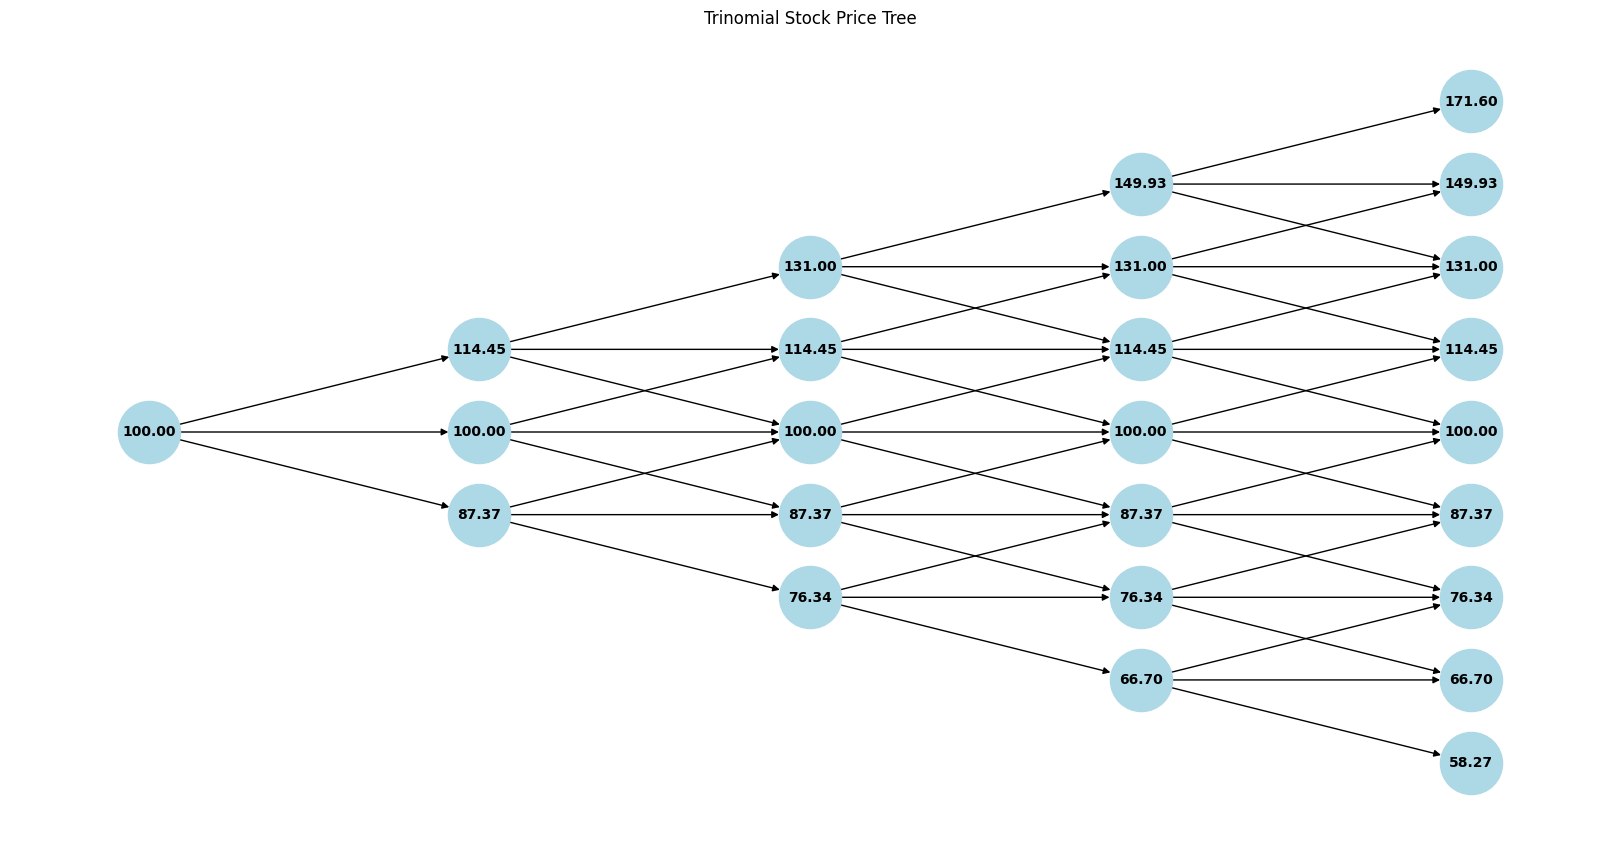

In [12]:
def plot_trinomial_tree(S, T, N, sigma):
    """
    Plots the trinomial tree with stock prices at each node,
    ensuring the highest prices are at the top.
    
    Parameters:
        S (float): Initial stock price.
        T (float): Time to maturity.
        N (int): Number of time steps.
        sigma (float): Volatility.
    """
    dt = T / N
    u = np.exp(sigma * np.sqrt(2 * dt))  # Up factor
    d = np.exp(-sigma * np.sqrt(2 * dt))  # Down factor
    
    G = nx.DiGraph()
    pos = {}
    labels = {}
    
    # Build tree structure and calculate stock prices
    for j in range(N + 1):  # Time steps
        for i in range(-j, j + 1):  # Nodes at each time step
            stock_price = S * u**max(i, 0) * d**max(-i, 0)
            node = f"({j},{i})"
            pos[node] = (j, i)  # Vertical position = node index (positive for upward movement)
            labels[node] = f"{stock_price:.2f}"  # Label with stock price
            G.add_node(node)
            
            if j < N:  # Add edges for the next time step
                next_j = j + 1
                G.add_edge(node, f"({next_j},{i})")       # Mid branch
                G.add_edge(node, f"({next_j},{i + 1})")   # Up branch
                G.add_edge(node, f"({next_j},{i - 1})")   # Down branch
    
    # Plot the tree with stock prices
    plt.figure(figsize=(16, 8))
    nx.draw(G, pos, with_labels=True, labels=labels, node_size=2000, node_color="lightblue", edge_color="black",font_weight="bold", font_size=10, font_color="black")
    plt.title("Trinomial Stock Price Tree")
    plt.xlabel("Time Steps")
    plt.ylabel("Stock Price Movement (Up/Down)")
    plt.show()

# Parameters for computation
params = {
    'S': 100,         # Stock price
    'X': 110,         # Strike price
    'T': 0.5,         # Time to maturity
    'r': 0.1,         # Risk-free rate
    'b': 0.1,         # Cost of carry
    'sigma': 0.27,    # Volatility
    'N': 4            # Number of steps for demonstration
}

# Plot trinomial tree with stock prices
plot_trinomial_tree(params['S'], params['T'], params['N'], params['sigma'])


In [17]:
def price_convertible_bond(S, X, T, r, sigma, N, face_value, coupon_rate, conversion_ratio, call_price=None, put_price=None):
    """
    Prices a convertible bond using a trinomial tree.

    Parameters:
        S (float): Initial stock price.
        X (float): Strike price (conversion price per share).
        T (float): Time to maturity.
        r (float): Risk-free rate.
        sigma (float): Volatility of the underlying stock.
        N (int): Number of time steps.
        face_value (float): Face value of the bond.
        coupon_rate (float): Annual coupon rate as a decimal.
        conversion_ratio (float): Number of shares per bond.
        call_price (float): Call price (if callable).
        put_price (float): Put price (if puttable).

    Returns:
        float: Convertible bond price at t=0.
    """
    dt = T / N
    u = np.exp(sigma * np.sqrt(2 * dt))  # Up factor
    d = np.exp(-sigma * np.sqrt(2 * dt))  # Down factor
    pu = ((np.exp(r * dt / 2) - np.exp(-sigma * np.sqrt(dt / 2))) /
          (np.exp(sigma * np.sqrt(dt / 2)) - np.exp(-sigma * np.sqrt(dt / 2))))**2
    pd = ((np.exp(sigma * np.sqrt(dt / 2)) - np.exp(r * dt / 2)) /
          (np.exp(sigma * np.sqrt(dt / 2)) - np.exp(-sigma * np.sqrt(dt / 2))))**2
    pm = 1 - pu - pd
    discount_factor = np.exp(-r * dt)
    
    # Initialize stock price tree
    stock_price_tree = np.zeros((N + 1, 2 * N + 1))
    for j in range(N + 1):
        for i in range(-j, j + 1):
            stock_price_tree[j, i + N] = S * u**max(i, 0) * d**max(-i, 0)
    
    # Initialize bond value tree
    bond_value_tree = np.zeros((N + 1, 2 * N + 1))
    
    # Terminal node values (at maturity)
    for i in range(-N, N + 1):
        if -N <= i <= N:
            stock_price = stock_price_tree[N, i + N]
            conversion_value = conversion_ratio * stock_price
            bond_value_tree[N, i + N] = max(face_value, conversion_value)
    
    # Backward induction
    for j in range(N - 1, -1, -1):
        for i in range(-j, j + 1):
            # Ensure indices are valid within bounds
            if -N <= i <= N:
                hold_value = (
                    (pu * bond_value_tree[j + 1, i + 2 + N] if i + 2 + N < 2 * N + 1 else 0) +
                    (pm * bond_value_tree[j + 1, i + 1 + N] if i + 1 + N < 2 * N + 1 else 0) +
                    (pd * bond_value_tree[j + 1, i + N] if i + N < 2 * N + 1 else 0)
                ) * discount_factor
                
                stock_price = stock_price_tree[j, i + N]
                conversion_value = conversion_ratio * stock_price
                
                bond_value = max(hold_value, conversion_value)  # Choose between holding and converting
                
                # Check for callable or puttable features
                if call_price is not None:
                    bond_value = min(bond_value, call_price)  # Callable: issuer can redeem
                if put_price is not None:
                    bond_value = max(bond_value, put_price)  # Puttable: bondholder can sell
                    
                bond_value_tree[j, i + N] = bond_value

    # Initial value at t=0
    return bond_value_tree[0, N], bond_value_tree

# Parameters for demonstration
params = {
    'S': 100,          # Initial stock price
    'X': 110,          # Strike price (conversion price)
    'T': 5,            # Time to maturity (years)
    'r': 0.05,         # Risk-free rate
    'sigma': 0.25,     # Volatility
    'N': 50,           # Number of steps
    'face_value': 1000, # Bond face value
    'coupon_rate': 0.03, # Annual coupon rate
    'conversion_ratio': 10, # Conversion ratio
    'call_price': 1050,  # Call price (optional)
    'put_price': 950     # Put price (optional)
}

# Price the convertible bond
bond_price, bond_value_tree = price_convertible_bond(**params)
print(f"Convertible Bond Price at t=0: {bond_price:.2f}")


Convertible Bond Price at t=0: 1000.00
